# Algorithmic Trading Model with ML4T Pandas Data Reader Examples
### David Lowe
### June 27, 2022

NOTE: This script is for learning purposes only and does not constitute a recommendation for buying or selling any stock mentioned in this script.

SUMMARY: This project aims to construct and test an algorithmic trading model and document the end-to-end steps using a template.

INTRODUCTION: This script aims to replicate the examples found in chapter one of the book Machine Learning for Algorithmic Trading by Stefan Jansen. The script seeks to validate further the Python environment and package requirements for running these code examples. The eventual goal is to integrate various example code segments into an end-to-end algorithmic trading system.

Dataset ML Model: Time series analysis with numerical attributes

Dataset Used: US Equities and Fund Prices Hosted by Various Data Sources

Source and Further Discussion of the Code Examples: https://www.ml4trading.io/chapter/1

## Imports & Settings

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
import os
from datetime import datetime
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns
from dotenv import load_dotenv

In [3]:
# Set up the dotenv file for retrieving environment variables
env_path = "/Users/david/PycharmProjects/quantfinVenv/"
dotenv_path = env_path + "quantfin.env"
load_dotenv(dotenv_path=dotenv_path)

True

## Download html table with SP500 constituents

The download of the content of one or more html tables works as follows, for instance for the constituents of the S&P500 index from Wikipedia

In [4]:
sp_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
sp500_constituents = pd.read_html(sp_url, header=0)[0]

In [5]:
sp500_constituents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 504 non-null    object
 1   Security               504 non-null    object
 2   SEC filings            504 non-null    object
 3   GICS Sector            504 non-null    object
 4   GICS Sub-Industry      504 non-null    object
 5   Headquarters Location  504 non-null    object
 6   Date first added       459 non-null    object
 7   CIK                    504 non-null    int64 
 8   Founded                504 non-null    object
dtypes: int64(1), object(8)
memory usage: 35.6+ KB


In [6]:
sp500_constituents.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981


## pandas-datareader for Market Data

`pandas` used to facilitate access to data providers' APIs directly, but this functionality has moved to the related pandas-datareader library. The stability of the APIs varies with provider policies, and as of June 2o18 at version 0.7, the following sources are available

See [documentation](https://pandas-datareader.readthedocs.io/en/latest/); functionality frequently changes as underlying provider APIs evolve.

### Yahoo Finance

In [7]:
start = '2015'
end = datetime(2020, 12, 31)

yahoo= web.DataReader('AMZN', 'yahoo', start=start, end=end)
yahoo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1511 entries, 2015-01-02 to 2020-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1511 non-null   float64
 1   Low        1511 non-null   float64
 2   Open       1511 non-null   float64
 3   Close      1511 non-null   float64
 4   Volume     1511 non-null   int64  
 5   Adj Close  1511 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 82.6 KB


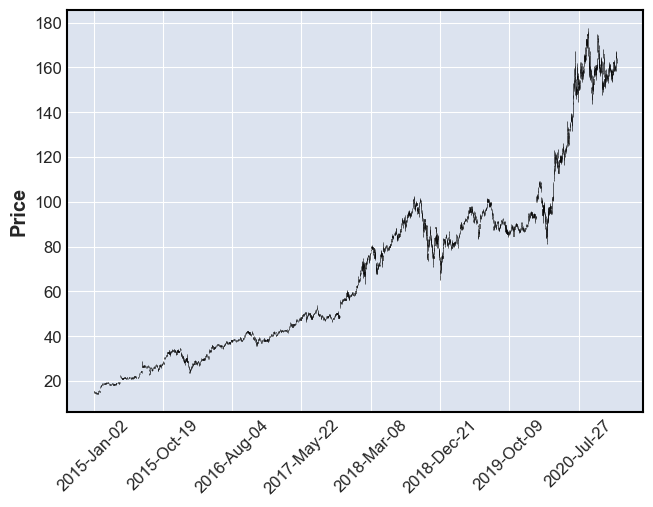

<Figure size 640x480 with 0 Axes>

In [8]:
mpf.plot(yahoo.drop('Adj Close', axis=1), type='candle')
plt.tight_layout()

### IEX

IEX is an alternative exchange started in response to the HFT controversy and portrayed in Michael Lewis' controversial Flash Boys. It aims to slow down the speed of trading to create a more level playing field and has been growing rapidly since launch in 2016 while still small with a market share of around 2.5% in June 2018.

> **Note:** IEX now requires an [API](https://iexcloud.io/) key after registration for (free) account that you can store as environment variable and retrieve as illustrated below, or pass directly via keyword argument to `pandas_datareader`.

In [9]:
# IEX_API_KEY=os.getenv('IEX_API_KEY')
# symbol = 'AMZN'

In [10]:
# start = datetime(2020, 12, 1)
# end = datetime(2020, 12, 31)
#
# iex = web.DataReader(symbol, 'iex', start, end, api_key=IEX_API_KEY)
# iex.info()

In [11]:
# iex.tail()

In [12]:
# sns.set_style('whitegrid')
# iex.close.plot(figsize=(16, 9))
# sns.despine()

#### Book Data

In addition to historical EOD price and volume data, IEX provides real-time depth of book quotations that offer an aggregated size of orders by price and side. This service also includes last trade price and size information.

DEEP is used to receive real-time depth of book quotations direct from IEX. The depth of book quotations received via DEEP provide an aggregated size of resting displayed orders at a price and side, and do not indicate the size or number of individual orders at any price level. Non-displayed orders and non-displayed portions of reserve orders are not represented in DEEP.

DEEP also provides last trade price and size information. Trades resulting from either displayed or non-displayed orders matching on IEX will be reported. Routed executions will not be reported.

Only works on trading days.

In [13]:
# book = web.get_iex_book('AAPL')

In [14]:
# list(book.keys())

In [15]:
# orders = pd.concat([pd.DataFrame(book[side]).assign(side=side) for side in ['bids', 'asks']])
# orders.head()

In [16]:
# for key in book.keys():
#     try:
#         print(f'\n{key}')
#         print(pd.DataFrame(book[key]))
#     except:
#         print(book[key])

In [17]:
# pd.DataFrame(book['trades']).head()

### Quandl

Obtain Quandl [API Key](https://www.quandl.com/tools/api) and store in environment variable as `QUANDL_API_KEY`.

In [18]:
symbol = 'AMZN.US'

quandl = web.DataReader(symbol, 'quandl', '2015-01-01')
quandl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 812 entries, 2018-03-27 to 2015-01-02
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        812 non-null    float64
 1   High        812 non-null    float64
 2   Low         812 non-null    float64
 3   Close       812 non-null    float64
 4   Volume      812 non-null    float64
 5   ExDividend  812 non-null    float64
 6   SplitRatio  812 non-null    float64
 7   AdjOpen     812 non-null    float64
 8   AdjHigh     812 non-null    float64
 9   AdjLow      812 non-null    float64
 10  AdjClose    812 non-null    float64
 11  AdjVolume   812 non-null    float64
dtypes: float64(12)
memory usage: 82.5 KB


In [19]:
quandl.tail()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2015-01-08,300.32,303.14,296.1100,300.46,3088398.0,0.0,1.0,300.32,303.14,296.1100,300.46,3088398.0
2015-01-07,297.50,301.28,295.3300,298.42,2640349.0,0.0,1.0,297.50,301.28,295.3300,298.42,2640349.0
2015-01-06,302.24,303.00,292.3800,295.29,3519034.0,0.0,1.0,302.24,303.00,292.3800,295.29,3519034.0
2015-01-05,307.01,308.38,300.8500,302.19,2774231.0,0.0,1.0,307.01,308.38,300.8500,302.19,2774231.0
2015-01-02,312.58,314.75,306.9601,308.52,2788101.0,0.0,1.0,312.58,314.75,306.9601,308.52,2788101.0


In [20]:
quandl = quandl[::-1]
quandl.tail()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2018-03-21,1586.45,1590.00,1563.17,1581.86,4667291.0,0.0,1.0,1586.45,1590.00,1563.17,1581.86,4667291.0
2018-03-22,1565.47,1573.85,1542.40,1544.10,6177737.0,0.0,1.0,1565.47,1573.85,1542.40,1544.10,6177737.0
2018-03-23,1539.01,1549.02,1495.36,1495.56,7843966.0,0.0,1.0,1539.01,1549.02,1495.36,1495.56,7843966.0
2018-03-26,1530.00,1556.99,1499.25,1555.86,5547618.0,0.0,1.0,1530.00,1556.99,1499.25,1555.86,5547618.0
2018-03-27,1572.40,1575.96,1482.32,1497.05,6793279.0,0.0,1.0,1572.40,1575.96,1482.32,1497.05,6793279.0


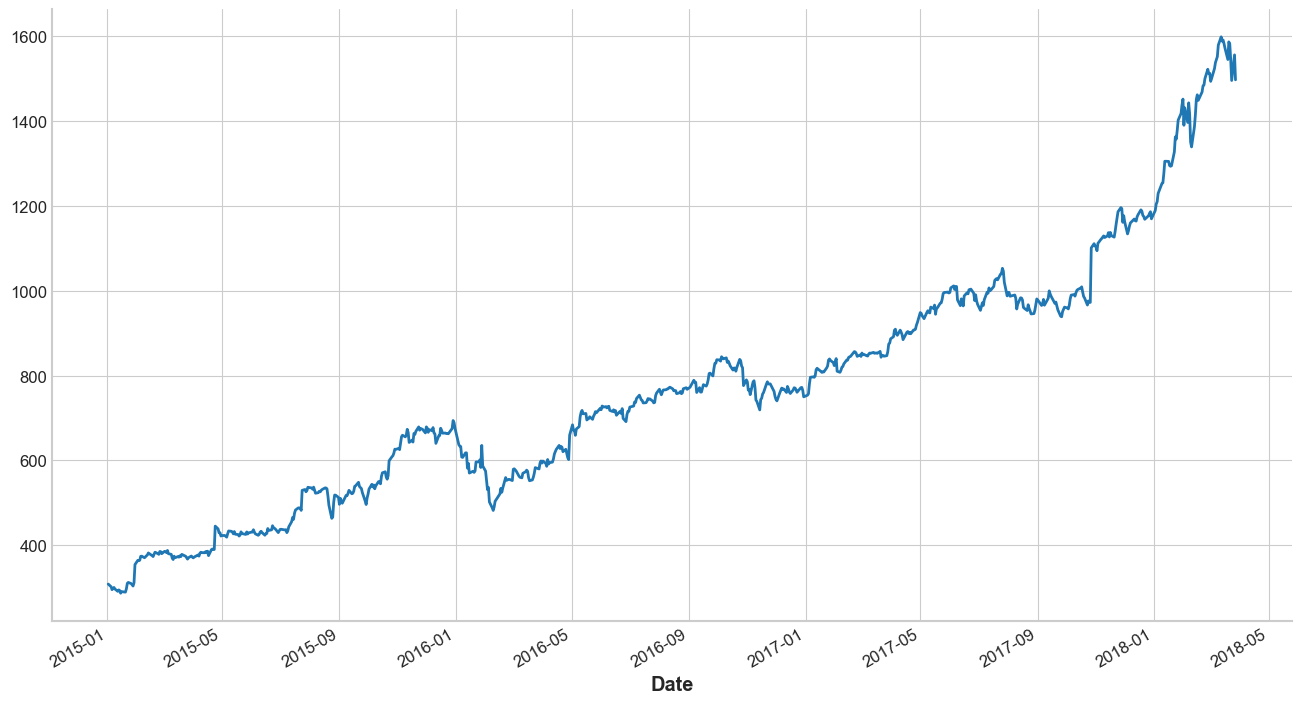

In [21]:
sns.set_style('whitegrid')
quandl.AdjClose.plot(figsize=(16, 9))
sns.despine()

### FRED

In [22]:
start = datetime(2020, 1, 1)
end = datetime(2020, 12, 31)
gdp = web.DataReader('GDP', 'fred', start, end)
gdp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4 entries, 2020-01-01 to 2020-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GDP     4 non-null      float64
dtypes: float64(1)
memory usage: 64.0 bytes


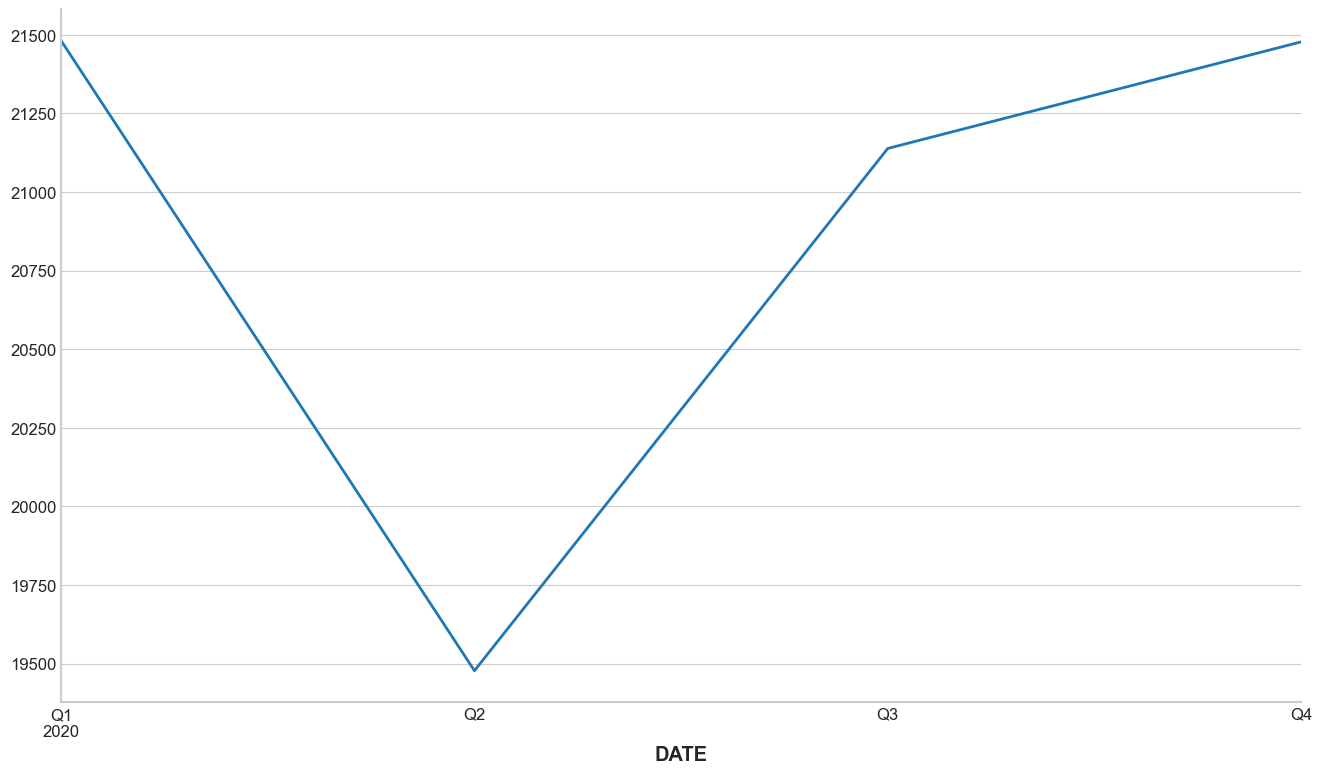

In [23]:
gdp.GDP.plot(figsize=(16, 9))
sns.despine()

In [24]:
inflation = web.DataReader(['CPIAUCSL', 'CPILFESL'], 'fred', start, end)
inflation.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2020-01-01 to 2020-12-01
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CPIAUCSL  12 non-null     float64
 1   CPILFESL  12 non-null     float64
dtypes: float64(2)
memory usage: 288.0 bytes


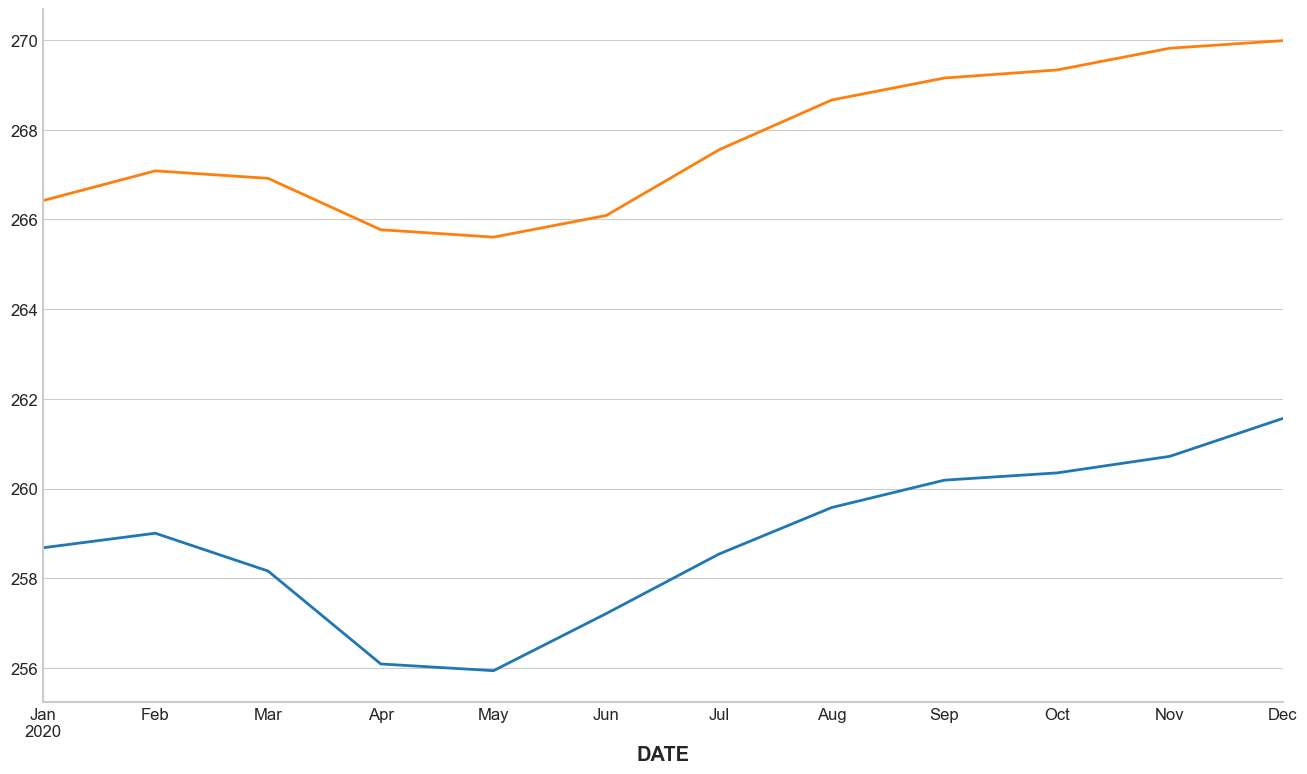

In [25]:
inflation.CPIAUCSL.plot(figsize=(16, 9))
inflation.CPILFESL.plot(figsize=(16, 9))
sns.despine()

### Fama/French

In [26]:
from pandas_datareader.famafrench import get_available_datasets
get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

In [27]:
ds = web.DataReader('5_Industry_Portfolios', 'famafrench')
print(ds['DESCR'])

5 Industry Portfolios
---------------------

This file was created by CMPT_IND_RETS using the 202204 CRSP database. It contains value- and equal-weighted returns for 5 industry portfolios. The portfolios are constructed at the end of June. The annual returns are from January to December. Missing data are indicated by -99.99 or -999. Copyright 2022 Kenneth R. French

  0 : Average Value Weighted Returns -- Monthly (59 rows x 5 cols)
  1 : Average Equal Weighted Returns -- Monthly (59 rows x 5 cols)
  2 : Average Value Weighted Returns -- Annual (5 rows x 5 cols)
  3 : Average Equal Weighted Returns -- Annual (5 rows x 5 cols)
  4 : Number of Firms in Portfolios (59 rows x 5 cols)
  5 : Average Firm Size (59 rows x 5 cols)
  6 : Sum of BE / Sum of ME (5 rows x 5 cols)
  7 : Value-Weighted Average of BE/ME (5 rows x 5 cols)


### World Bank

In [28]:
from pandas_datareader import wb
wb_data = wb.download(indicator='NY.GDP.PCAP.KD',
                      country=['US', 'CA', 'MX'], 
                      start=1990, 
                      end=2019)
wb_data.head()

NY.GDP.PCAP.KD
country year                
Canada  2019    45109.244486
        2018    44917.483728
        2017    44325.488337
        2016    43536.913403
        2015    43596.135537

### OECD

In [ ]:
df = web.DataReader('TUD', 'oecd', start='2010', end='2015')
df[['Japan', 'United States']]

ReadTimeout: HTTPSConnectionPool(host='stats.oecd.org', port=443): Read timed out. (read timeout=30)

### Stooq

Google finance stopped providing common index data download. The Stooq site had this data for download for a while but is currently broken, awaiting release of [fix](https://github.com/pydata/pandas-datareader/issues/594)

In [30]:
index_url = 'https://stooq.com/t/'
ix = pd.read_html(index_url)
len(ix)

47

In [31]:
sp500_stooq = web.DataReader('^SPX', 'stooq')
sp500_stooq.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2022-06-16 to 2017-06-19
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1259 non-null   float64
 1   High    1259 non-null   float64
 2   Low     1259 non-null   float64
 3   Close   1259 non-null   float64
 4   Volume  1259 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [32]:
sp500_stooq.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-06-16,3728.18,3728.18,3639.77,3666.77,2256056152
2022-06-15,3764.05,3837.56,3722.30,3789.99,2761970436
2022-06-14,3763.52,3778.18,3705.68,3735.48,2639249798
2022-06-13,3838.15,3838.15,3734.30,3749.63,3067433318
2022-06-10,3974.39,3974.39,3900.16,3900.86,2475868478


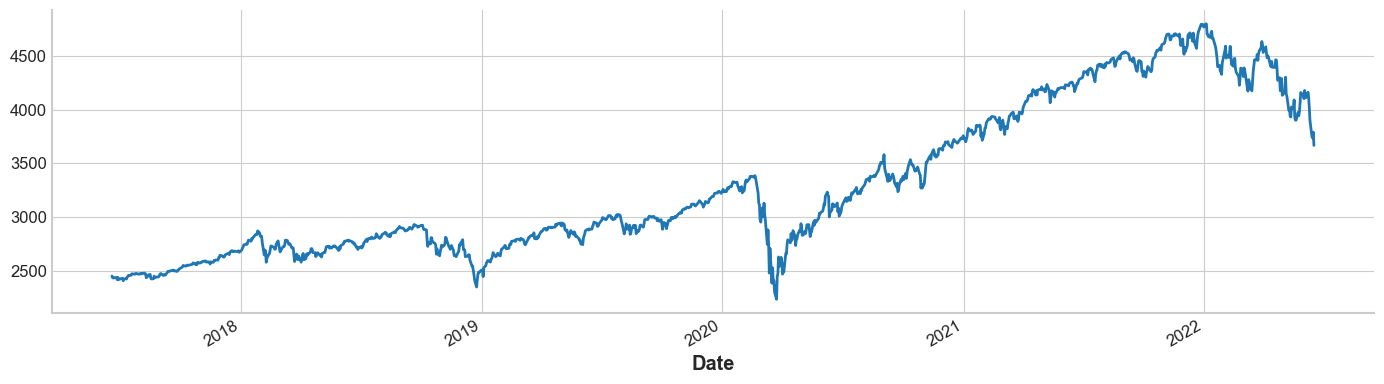

In [33]:
sp500_stooq.Close.plot(figsize=(14,4))
sns.despine()
plt.tight_layout()

### NASDAQ Symbols

In [34]:
from pandas_datareader.nasdaq_trader import get_nasdaq_symbols
symbols = get_nasdaq_symbols()
symbols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12196 entries, A to ZYXI
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Nasdaq Traded     12196 non-null  bool    
 1   Security Name     12196 non-null  object  
 2   Listing Exchange  12196 non-null  category
 3   Market Category   12196 non-null  object  
 4   ETF               12196 non-null  bool    
 5   Round Lot Size    12196 non-null  float64 
 6   Test Issue        12196 non-null  bool    
 7   Financial Status  5701 non-null   category
 8   CQS Symbol        6495 non-null   object  
 9   NASDAQ Symbol     12196 non-null  object  
 10  NextShares        12196 non-null  bool    
dtypes: bool(4), category(2), float64(1), object(4)
memory usage: 643.6+ KB


In [35]:
symbols.head()

,Nasdaq Traded,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
Symbol,,,,,,,,,,,
A,True,"Agilent Technologies, Inc. Common Stock",N,,False,100.0,False,NaN,A,A,False
AA,True,Alcoa Corporation Common Stock,N,,False,100.0,False,NaN,AA,AA,False
AAA,True,Listed Funds Trust AAF First Priority CLO Bond...,P,,True,100.0,False,NaN,AAA,AAA,False
AAAU,True,Goldman Sachs Physical Gold ETF Shares,Z,,True,100.0,False,NaN,AAAU,AAAU,False
AAC,True,Ares Acquisition Corporation Class A Ordinary ...,N,,False,100.0,False,NaN,AAC,AAC,False


In [36]:
symbols.tail()

,Nasdaq Traded,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
Symbol,,,,,,,,,,,
ZXZZT,True,NASDAQ TEST STOCK,Q,G,False,100.0,True,N,NaN,ZXZZT,False
ZY,True,Zymergen Inc. - Common Stock,Q,Q,False,100.0,False,N,NaN,ZY,False
ZYME,True,Zymeworks Inc. Common Shares,N,,False,100.0,False,NaN,ZYME,ZYME,False
ZYNE,True,"Zynerba Pharmaceuticals, Inc. - Common Stock",Q,G,False,100.0,False,N,NaN,ZYNE,False
ZYXI,True,"Zynex, Inc. - Common Stock",Q,Q,False,100.0,False,N,NaN,ZYXI,False


### Tiingo

Requires [signing up](https://api.tiingo.com/) and storing API key in environment

In [37]:
tiingo = web.get_data_tiingo('AMZN', api_key=os.getenv('TIINGO_API_KEY'))

In [38]:
tiingo.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1259 entries, ('AMZN', Timestamp('2017-06-19 00:00:00+0000', tz='UTC')) to ('AMZN', Timestamp('2022-06-16 00:00:00+0000', tz='UTC'))
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   close        1259 non-null   float64
 1   high         1259 non-null   float64
 2   low          1259 non-null   float64
 3   open         1259 non-null   float64
 4   volume       1259 non-null   int64  
 5   adjClose     1259 non-null   float64
 6   adjHigh      1259 non-null   float64
 7   adjLow       1259 non-null   float64
 8   adjOpen      1259 non-null   float64
 9   adjVolume    1259 non-null   int64  
 10  divCash      1259 non-null   float64
 11  splitFactor  1259 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 164.1+ KB


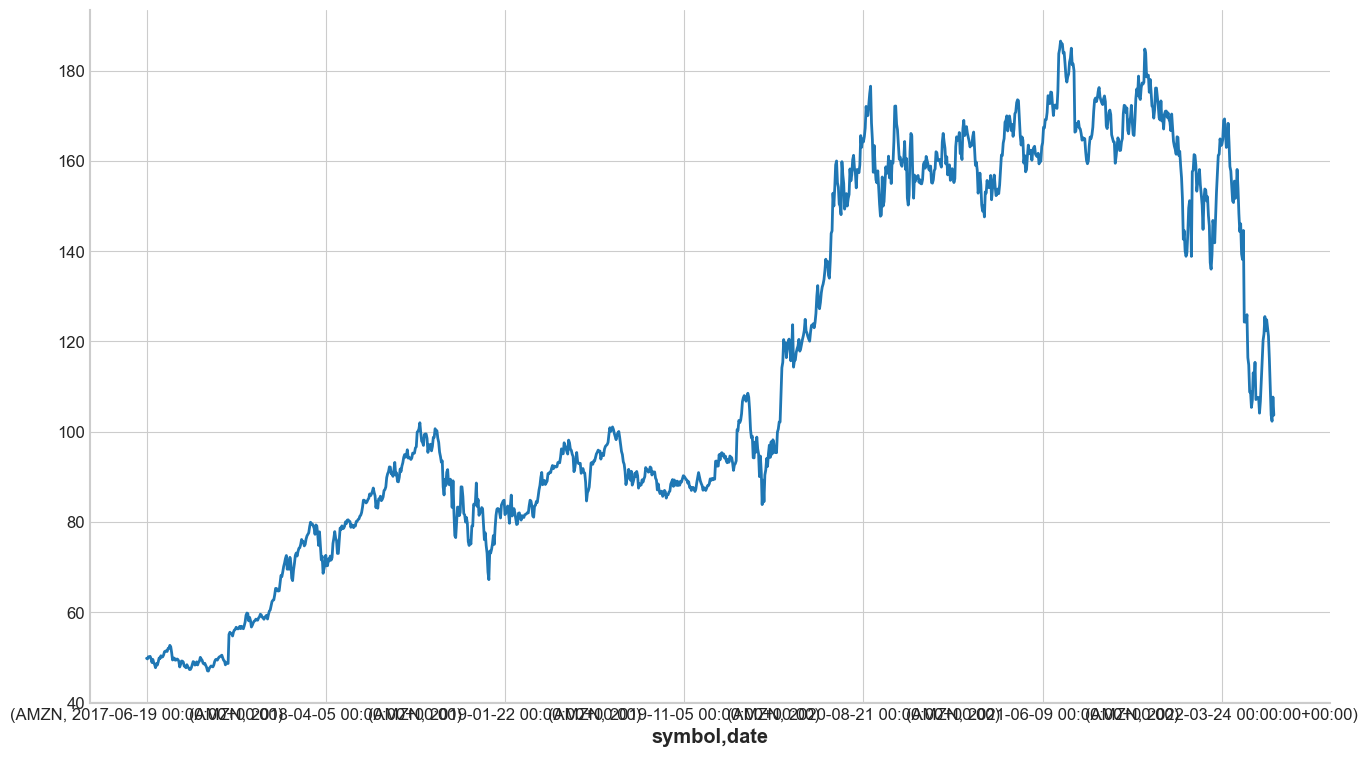

In [39]:
tiingo.adjClose.plot(figsize=(16, 9))
sns.despine()